In [2]:
import pandas as pd
import numpy as np
#import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [6]:
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [72]:
global month, longitudes, latitudes, coords

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

longitudes = np.arange(0,360,3.75)
latitudes = np.arange(90,-92.5,-2.5)
#latitudes = np.arange(0,182.5,2.5)

long_mesh, lat_mesh = np.meshgrid(longitudes, latitudes)
coords = np.column_stack((long_mesh.ravel(), lat_mesh.ravel()))

def diffileconv(file):
    global month 
    var_line = []
    var = []
    weather = {}

    
    with open(file) as f:
        lines = f.readlines()

        for l in lines:
            if "7008" in l:
                pass
            else:
                ts = l.split(' ')
                ts = [t for t in ts if t != '']
                for item in ts:
                    try:
                        var.append(float(item))
                    except: 
                        break


    monthly_var = []

    for i in range(0, len(var), int(len(var)/len(month))):
        monthly_var.append(var[i : i + int(len(var)/len(month))])

    for i in range(0, 12):
        weather[month[i]] = monthly_var[i]

    df = pd.DataFrame(weather)

    mat = df.to_numpy().transpose().reshape(12,73,96)
    #mat = np.roll(mat, 48, axis=2)

    df['Longitude'] = coords[:,0]
    df['Latitude'] = coords[:,1]

    return mat, df  


In [73]:
temps_mat = diffileconv("weather-data\A2a\HADCM3_A2a_TEMP_2020.dif")[0]
temps_df = diffileconv("weather-data\A2a\HADCM3_A2a_TEMP_2020.dif")[1]

temps_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Longitude,Latitude
0,1.79,2.23,2.15,1.48,0.83,-0.03,-0.02,0.13,4.51,5.19,4.95,1.33,0.00,90.0
1,1.79,2.23,2.15,1.48,0.83,-0.03,-0.02,0.13,4.51,5.19,4.95,1.33,3.75,90.0
2,1.79,2.23,2.15,1.48,0.83,-0.03,-0.02,0.13,4.51,5.19,4.95,1.33,7.50,90.0
3,1.79,2.23,2.15,1.48,0.83,-0.03,-0.02,0.13,4.51,5.19,4.95,1.33,11.25,90.0
4,1.79,2.23,2.15,1.48,0.83,-0.03,-0.02,0.13,4.51,5.19,4.95,1.33,15.00,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,0.71,1.61,1.90,2.21,2.11,1.37,1.21,2.53,0.02,0.37,1.50,1.08,341.25,-90.0
7004,0.71,1.61,1.90,2.21,2.11,1.37,1.21,2.53,0.02,0.37,1.50,1.08,345.00,-90.0
7005,0.71,1.61,1.90,2.21,2.11,1.37,1.21,2.53,0.02,0.37,1.50,1.08,348.75,-90.0
7006,0.71,1.61,1.90,2.21,2.11,1.37,1.21,2.53,0.02,0.37,1.50,1.08,352.50,-90.0


In [64]:
temps_mat[0].shape

(73, 96)

In [56]:
len(longitudes)

96

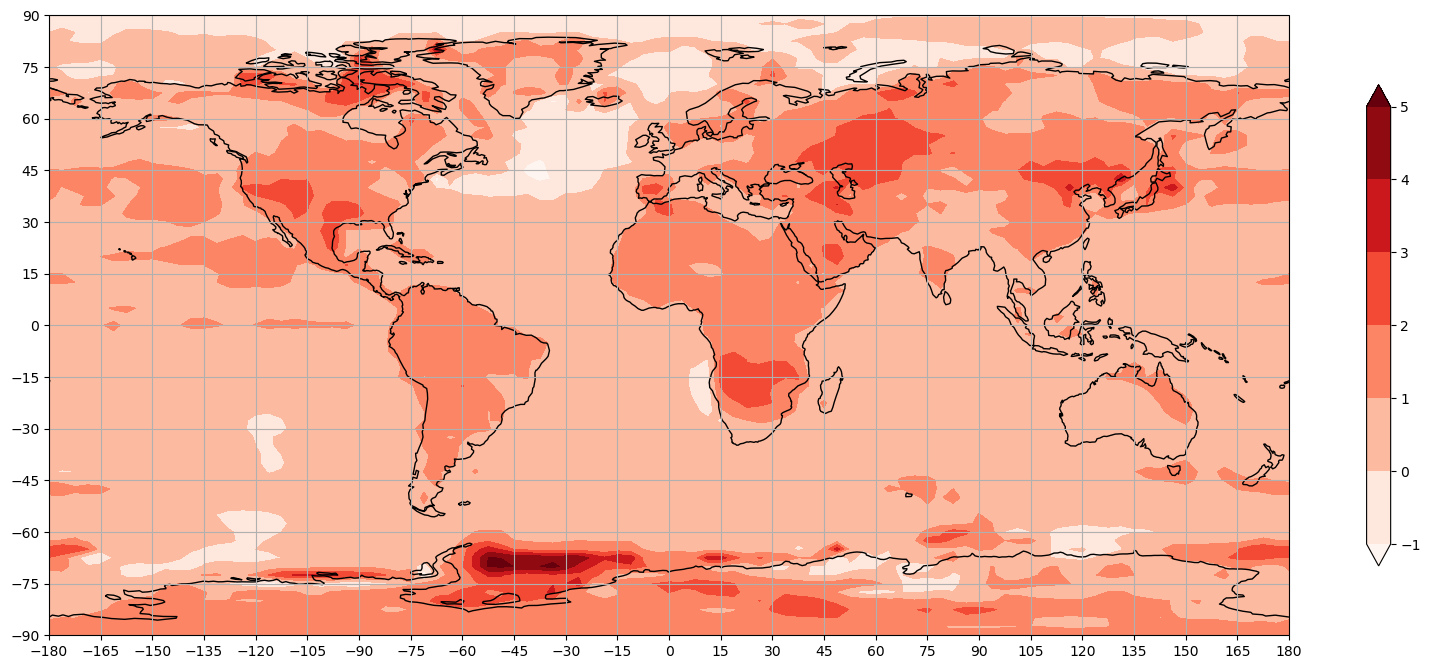

In [93]:
# Make the figure larger
fig = plt.figure(figsize=(20,25))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

data, lons = add_cyclic_point(temps_mat[5], coord = longitudes)

cs=ax.contourf(lons, latitudes, data,
            transform = ccrs.PlateCarree(),cmap='Reds',extend='both')
# Add coastlines
ax.coastlines()

'''
line_c = ax.contour(lons, latitudes, data, levels=cs.levels,
                    colors=['black'], linewidth = 0.25,
                    transform=ccrs.PlateCarree())
'''
# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,15), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,15), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
#ax.yaxis.set_major_formatter(lat_formatter)


ax.grid()
cbar = plt.colorbar(cs, shrink = 0.25)

In [72]:
long_mesh, lat_mesh = np.meshgrid(longitudes, latitudes)
coords = np.column_stack((long_mesh.ravel(), lat_mesh.ravel()))

In [ ]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
ax.contourf(ds['lon'], ds['lat'], ds_mean['tas'],
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

In [124]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the geographic data
gdf.plot(ax=ax, column='Jul', cmap='Reds')

# Add a tile map from an online tile map service (e.g., OpenStreetMap)
#ctx.add_basemap(ax, source=ctx.providers.OpenTopo)

# Add labels, title, etc. as desired
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Heatmap Overlay on Base Map')

# Display the plot
plt.show()


KeyError: 'Longitude'